<a href="https://colab.research.google.com/github/SahanaDil/UCSD-deep-neural-networks/blob/main/ExpWeightedMovingAvg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved


# Moving Averages
In this project, you will experiment with moving averages as described in the previous lecture units.  You will create a synthetic dataset and write code to calculate the simple, cumulative, and exponential moving averages.  
You will then collect real data and analyze it using the code you produced.  
The code you write may contain Python Numpy and Pandas libraries but you will also code the algorithms from scratch where indicated in the steps below.

Please complete the following steps in your Colab Script. The reference script below provides template code and hints to help with each step. You will be turning in code and screenshots of your console output in an accompanying assignment.

**Step 1:**  Create a synthetic dataset.  
- Set the number of examples to 500 and the number of points to plot to 50.
- Generate a normally distributed dataset with mean=10 and standard deviation, std=2.  Scale the output dependent variable by 10.
- Plot the dataset.


Make sure the doctests pass without error.

TestResults(failed=0, attempted=4)

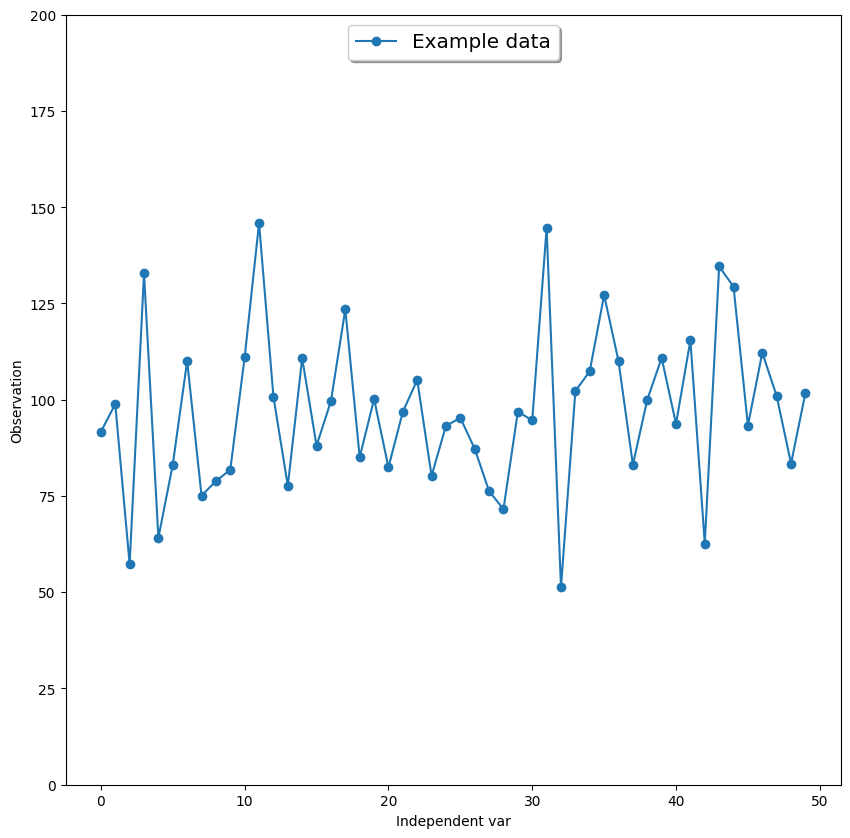

In [8]:
# Create dataset

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)  #do not change - for grading purposes

#Set the number of examples (datapoints) to create (N) and number of points to plot (M)
N = 500
M = 50

#Create dataset.
#   Create normally distributed dataset with mean=10 and standard deviation, std=2. Scale the output dependent variable by 10.
#   Use N+1 points so don't have div-by-zero in first calculation
#   Hint:  https://numpy.org/doc/stable/reference/generated/numpy.arange.html
#   Hint:  https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
X = np.arange(N+1)
Y = np.random.normal(loc=10, scale=2, size=N+1) * 10

d = plt.figure()
d.set_figwidth(10)
d.set_figheight(10)
plt.plot(X[0:M], Y[0:M], 'o-', label='Example data')

plt.xlabel('Independent var')
plt.ylabel('Observation')
plt.ylim(0,200)
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')


import doctest

"""
  >>> print(np.round(Y[0], 3))
  91.665
  >>> print(np.round(Y[10], 3))
  111.029
  >>> print(np.round(Y[275], 3))
  92.975
  >>> print(np.round(Y[499], 3))
  130.926
"""

doctest.testmod()


**Step 2:** Compute the Simple Moving Average (SMA) from scratch  
- **Note:** No library imports are allowed except for Numpy

Set the number of points to calculate the moving average to 10; i.e.,  Y samples [0, 10)   
Do this ONLY using the Numpy library (you may not use any other packages).  
Make sure your doctests pass without errors.

In [9]:
#Simple Moving Average (SMA)

# No library imports are allowed except for Numpy!!

#Set the datapoint to end at inclusive. (n in lecture notes)
end=15
#Set the number of points to calculate the moving average (k in lecture notes)
k = 10

#Calculate the Simple Moving Average (SMA)
SMA = np.mean(Y[end - k : end + 1])


import doctest

"""
  >>> print(np.round(SMA, 3))
  97.51
"""

doctest.testmod()


**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(SMA, 3))
Expected:
    97.51
Got:
    96.653
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

**Step 3:** Compute the Cumulative Moving Average (CMA) from scratch  
- **Note:** No library imports are allowed except for Numpy  

Set the number of points to calculate the moving average to 10; i.e.,  Y samples [0, 10)   
Do this ONLY using the Numpy library (you may not use any other packages).  
Make sure your doctests pass without errors.


In [10]:
# Cumulative Moving Average (CMA)

# No library imports are allowed except for Numpy!!

#Set the number of points to calculate the moving average
M = 10

#Calculate the Cumulative Moving Average (CMA)
CMA = np.mean(Y[:M])


import doctest

"""
  >>> print(np.round(CMA, 3))
  87.373
"""

doctest.testmod()


TestResults(failed=0, attempted=1)

**Step 4:** Compute the Exponentially Weighted Moving Average (EMA) from scratch  
- **Note:** No library imports are allowed except for Numpy

Perform exponential weighted moving average on dataset with and without bias correction.  
Do this ONLY using the Numpy library (you may not use any other packages).  
Refer to the lecture videos for hints on how to calculate the EMA's:

EMA:  $V_t = \beta V_{t-1}+(1-\beta)\theta_t$  
EMA (bias-corrected):  $V_t = \frac{V_t}{1-\beta^t}$

Use matplotlib to plot your results.  
Make sure your doctests pass without errors.

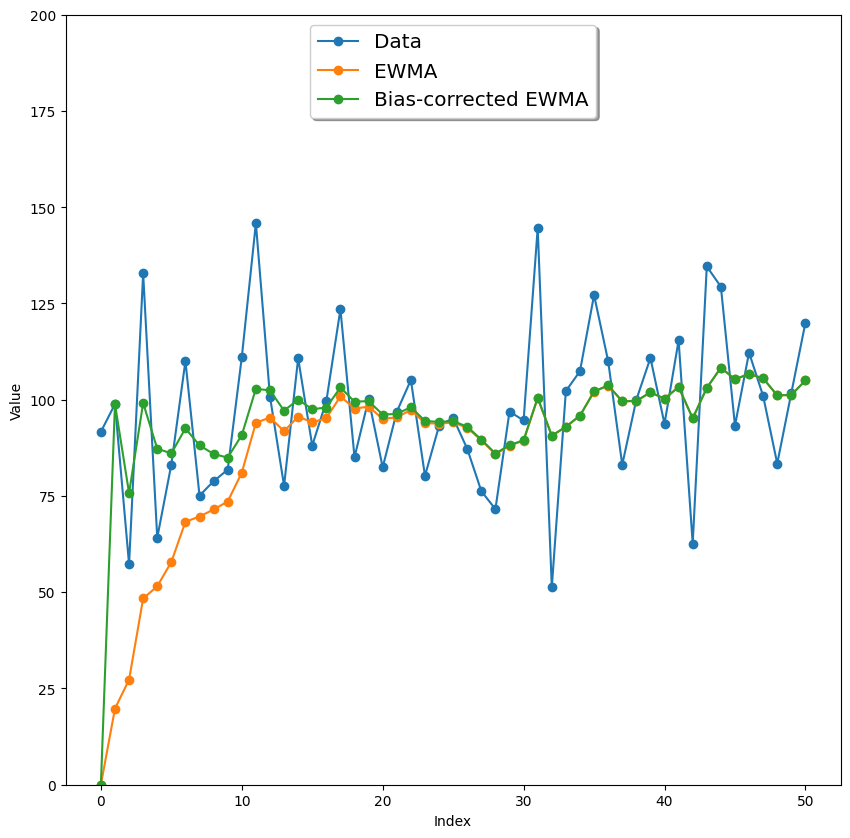

**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(ewma[20], 3))
Expected:
    95.258
Got:
    95.047
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(ewma[40], 3))
Expected:
    100.266
Got:
    100.264
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(ewma_biasCorrected[20], 3))
Expected:
    96.37
Got:
    96.156
**********************************************************************
File "__main__", line 13, in __main__
Failed example:
    print(np.round(ewma_biasCorrected[40], 3))
Expected:
    100.279
Got:
    100.277
**********************************************************************
1 items had failures:
   4 of   6 in __main__
***Test Failed*** 4 failures.


TestResults(failed=4, attempted=6)

In [18]:
# Compute the exponential weighted moving average on dataset with and without bias correction

# No library imports are allowed except for Numpy!!

#Set the number of points to calculate the moving average
M = 50

#Initialze with M+1 observations (use M+1 so don't have div by zero)
ewma=np.zeros(M+1)
ewma_biasCorrected=np.zeros(M+1)
beta = 0.8    #set beta - do not change, for grading purposes

#Initial conditions
#V1 = beta*V0 + (1-beta)*theta_1
#V1 = beta*V0 + (1-beta)*Y1 = beta*(1-beta)*Y0 + (1-beta)*Y1
ewma[1]= (1-beta) * Y[1]
ewma_biasCorrected[1]= ewma[1]/ (1-beta**1)

#Vt = beta*(Vt-1) + (1-beta)*theta_t
for i in range(1, M):
  ewma[i+1]= beta * ewma[i] + (1-beta) * Y[i+1]


#Calculate bias-corrected ema
#Vt = Vt/(1-beta^t)
for i in range(1, M):
  ewma_biasCorrected[i+1]= ewma[i+1]/(1-beta**(i+1))


#Plot the data
#   Create line graphs of the data (X, Y), ewma, and ewma_biasCorrected
X_plot = X[:M+1]
Y_plot = Y[:M+1]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(X_plot, Y_plot,'o-', label='Data')  #data
plt.plot(X_plot, ewma,'o-', label='EWMA')  #ewma
plt.plot(X_plot, ewma_biasCorrected,'o-', label='Bias-corrected EWMA')  #ewma_biaseCorrected

plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0,200)
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()



import doctest

"""
  >>> print(np.round(ewma[0], 3))
  0.0
  >>> print(np.round(ewma[20], 3))
  95.258
  >>> print(np.round(ewma[40], 3))
  100.266
  >>> print(np.round(ewma_biasCorrected[0], 3))
  0.0
  >>> print(np.round(ewma_biasCorrected[20], 3))
  96.37
  >>> print(np.round(ewma_biasCorrected[40], 3))
  100.279
"""

doctest.testmod()

**Step 5:** Implement the Exponentially Weighted Moving Average using Pandas  
- **Note:** Use Numpy and Pandas ewm function for this step

Refer to the the Pandas API for hints on how to use the ewm function:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
- Set the span to 50
- Set the decaying adjustment factor to False

Use matplotlib to plot your results.  
Make sure your doctests pass without errors.


Pandas DataFrame: 


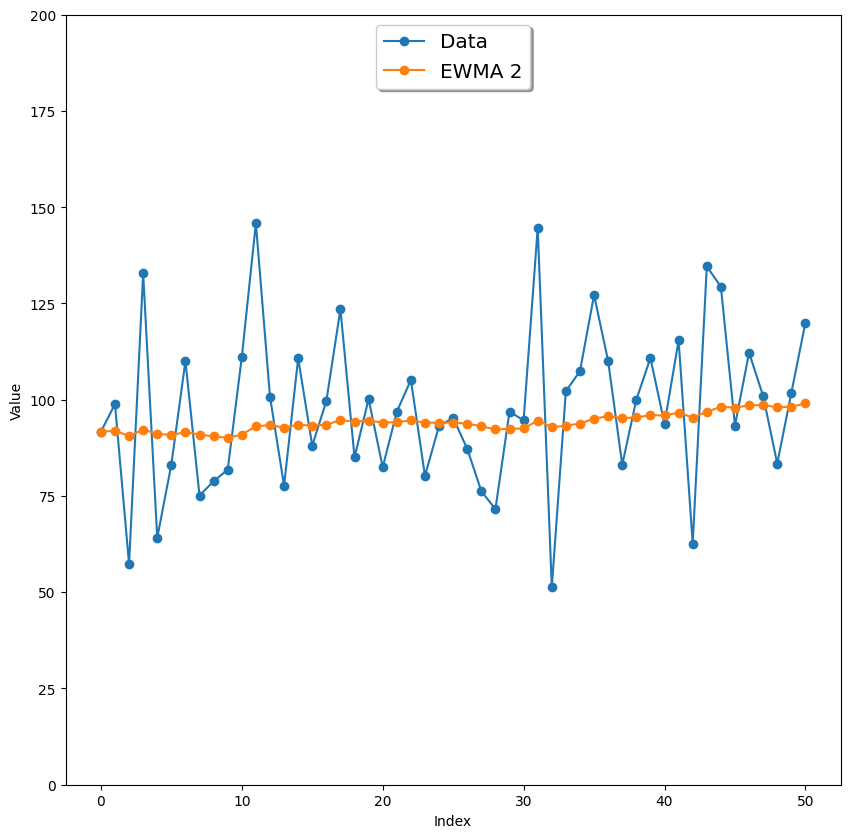

TestResults(failed=0, attempted=3)

In [25]:
import numpy as np
import pandas as pd

M=50

# convert numpy array to dataframe
df = pd.Series(Y)
print("\nPandas DataFrame: ")

#Calculate EMA using Pandas function
#  Set the span to 50 (for grading purposes)
#  Set the decaying adjustment factor to False (for grading purposes)
ewma_2 = df.ewm(span=50, adjust=False).mean()

#Plot the data (X,Y), ewma_2
X_plot = X[:M+1]
Y_plot = Y[:M+1]
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
plt.plot(X_plot, Y_plot, 'o-', label='Data')  #data
plt.plot(X_plot, ewma_2[:M+1],'o-', label='EWMA 2')  #ewma_2

plt.xlabel('Index')
plt.ylabel('Value')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.ylim(0,200)

plt.show()


import doctest

"""
  >>> print(np.round([ewma_2[0]], 3))
  [91.665]
  >>> print(np.round([ewma_2[20]], 3))
  [94.075]
  >>> print(np.round([ewma_2[40]], 3))
  [95.91]
"""

doctest.testmod()